### Load libraries to perform operation with dataset

In [24]:
# a powerful data analysis and manipulation library for Python
import pandas as pd 
# Fast mathematical operations over arrays
import numpy as np  
# pyplot is mainly intended for interactive plots and simple cases of programmatic plot generation:: 
import matplotlib.pyplot as plt  
# the output of plotting commands is displayed inline within frontends.
%matplotlib inline  
# Split arrays or matrices into random train and test subsets
from sklearn.model_selection import train_test_split
# Ordinary least squares Linear Regression. LinearRegression fits a linear model with coefficients
from sklearn.linear_model import LinearRegression
# Mean absolute error regression loss
from sklearn.metrics import mean_absolute_error
# R^2 (coefficient of determination) regression score function.Best possible score is 1.0
from sklearn.metrics import r2_score
# Seaborn is a Python data visualization library based on matplotlib. 
# It provides a high-level interface for drawing attractive and informative statistical graphics.
import seaborn as sns 

### Load dataset from given url

In [5]:
url="https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
# Read a comma-separated values (csv) file into DataFrame.
c=pd.read_csv(url)

### Show loaded data

In [6]:
# This function returns the first 5 rows for the object based on position.
c.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Check weather dataset contains missing value or not

In [38]:
c.isnull().sum()

Hours     0
Scores    0
dtype: int64

### Check linear relation between two variables using pearson correlation method

In [39]:
c.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


### Since pearson correlation method for our dataset show us positive linearity so lets move forward for preaparing data for modelling

In [40]:
X = c.iloc[:,:-1].values #for no of study hours
y = c.iloc[:,1].values # for scored marks 
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.3, random_state=0)

### Training the linear regression algorithm

In [41]:
lr = LinearRegression()  
lr.fit(X_train, y_train) 

print("Training completed for linear regression.")

Training completed for linear regression.


### Plot data and a linear regression model fit.

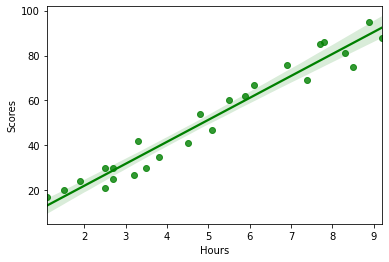

In [42]:
sns.regplot(x="Hours", y="Scores", data=c ,color='g')

### Compare output with testing data

In [43]:
print(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]]


### Predict using the linear model.

In [44]:
y_pred = lr.predict(X_test)

### Comparing Actual vs Predicted

In [45]:
output = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
output

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


### The mean absolute error (MAE) is the simplest regression error metric to understand. We'll calculate the residual for every data point,

In [46]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.419727808027651


### R^2 (coefficient of determination) regression score function.Best possible score is 1.0


In [47]:
print("Accuracy score or r2_score for our model :",r2_score(y_test,y_pred)*100,"%")

Accuracy score or r2_score for our model : 95.68211104435257 %


### What will be predicted score if a student studies for 9.25 hrs/ day?

In [48]:
usercase = lr.predict([[9.25]])
print("predicted score if a student studies for 9.25 hrs/ day :",usercase)

predicted score if a student studies for 9.25 hrs/ day : [92.91505723]
